## Exercises 1

In [1]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [2]:
import numpy as np
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1 ,cache=True)
    mnist.target = mnist.target.astype(np.int8)
    sort_by_target(mnist)
except ImportError:
    from sklearn.datesets import fetch_mldata
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [5]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: user 24.7 s, sys: 136 ms, total: 24.8 s
Wall time: 24.8 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
%%time
from sklearn.model_selection import cross_val_score
# cross_val_score(knn, X_train, y_train, cv=3, scoring="accuracy")

CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 12.9 µs


In [54]:
# Beacuuse of big data, we need 10% of train data.
from sklearn.model_selection import train_test_split
T, X_train_10 = train_test_split(X_train, test_size=0.01, random_state=42)
T, y_train_10 = train_test_split(y_train, test_size=0.01, random_state=42)
len(X_train_10)

600

In [68]:
y_train_10[100:600]

array([8, 5, 5, 8, 3, 1, 1, 1, 9, 7, 4, 3, 6, 7, 0, 7, 3, 2, 0, 6, 4, 2,
       7, 0, 0, 9, 7, 5, 4, 6, 8, 6, 1, 6, 2, 1, 2, 1, 7, 2, 1, 0, 5, 9,
       0, 8, 5, 3, 2, 6, 4, 0, 7, 6, 8, 0, 2, 5, 0, 3, 9, 7, 3, 4, 9, 1,
       9, 3, 0, 9, 0, 3, 4, 4, 8, 3, 7, 0, 9, 1, 4, 0, 5, 3, 9, 5, 9, 2,
       6, 3, 6, 2, 0, 9, 3, 3, 0, 1, 1, 2, 4, 2, 6, 1, 7, 0, 5, 1, 3, 5,
       1, 8, 0, 5, 1, 1, 0, 7, 6, 0, 8, 7, 1, 8, 2, 3, 3, 7, 5, 2, 8, 1,
       3, 6, 4, 0, 8, 8, 4, 0, 3, 2, 3, 8, 9, 6, 2, 9, 1, 5, 2, 6, 5, 9,
       5, 3, 7, 0, 2, 9, 5, 0, 2, 2, 9, 2, 0, 0, 9, 9, 0, 1, 8, 6, 8, 2,
       3, 8, 6, 1, 7, 5, 8, 3, 7, 1, 0, 0, 5, 7, 5, 9, 0, 0, 1, 9, 5, 7,
       6, 3, 0, 8, 0, 1, 9, 2, 3, 7, 9, 6, 0, 9, 4, 9, 1, 2, 7, 3, 7, 9,
       1, 5, 2, 8, 8, 5, 9, 4, 6, 1, 9, 7, 8, 1, 1, 7, 1, 9, 1, 0, 9, 8,
       8, 5, 5, 2, 3, 7, 6, 3, 8, 7, 9, 0, 4, 6, 0, 5, 1, 5, 9, 2, 0, 5,
       3, 8, 4, 8, 6, 1, 4, 0, 7, 1, 7, 2, 3, 8, 5, 3, 8, 5, 1, 1, 4, 9,
       5, 2, 4, 9, 0, 0, 6, 3, 3, 7, 3, 6, 4, 8, 8,

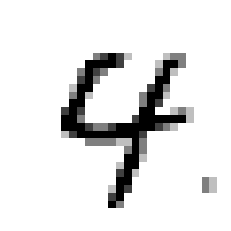

In [56]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = X_train_10[120]
some_digit_image = some_digit.reshape(28 ,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [57]:
y_train_10[120]

4

In [69]:
%%time
cross_val_score(knn, X_train_10, y_train_10, cv=3, scoring="accuracy")

CPU times: user 310 ms, sys: 2.77 ms, total: 313 ms
Wall time: 313 ms


array([0.785, 0.895, 0.82 ])

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(2, 31))
print(k_range)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [61]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [70]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [71]:
%%time
grid.fit(X_train_10, y_train_10)

CPU times: user 15.8 s, sys: 140 ms, total: 15.9 s
Wall time: 16 s


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [72]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [74]:
cvres = grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.9110433579144299 {'n_neighbors': 2}
0.9219544457292888 {'n_neighbors': 3}
0.9165151389911681 {'n_neighbors': 4}
0.9192388155425117 {'n_neighbors': 5}
0.9165151389911681 {'n_neighbors': 6}
0.9146948489341495 {'n_neighbors': 7}
0.9146948489341495 {'n_neighbors': 8}
0.9110433579144299 {'n_neighbors': 9}
0.9110433579144299 {'n_neighbors': 10}
0.9082951062292475 {'n_neighbors': 11}
0.9036961141150639 {'n_neighbors': 12}
0.9046177830074608 {'n_neighbors': 13}
0.8990735972840785 {'n_neighbors': 14}
0.8934950102453473 {'n_neighbors': 15}
0.8878813734578135 {'n_neighbors': 16}
0.8860022573334675 {'n_neighbors': 17}
0.8888194417315588 {'n_neighbors': 18}
0.8841191473249895 {'n_neighbors': 19}
0.8831760866327847 {'n_neighbors': 20}
0.8793937305515279 {'n_neighbors': 21}
0.8765462528203137 {'n_neighbors': 22}
0.8793937305515279 {'n_neighbors': 23}
0.8698658900466593 {'n_neighbors': 24}
0.8708233651742088 {'n_neighbors': 25}
0.8679477710861024 {'n_neighbors': 26}
0.8660254037844386 {'n_neighbors'

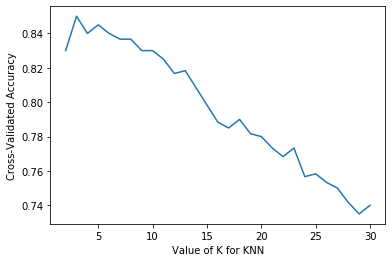

In [79]:
import matplotlib.pyplot as plt
plt.plot(k_range, list(cvres["mean_test_score"]))
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## Searching multiple parameters simultaneously on part of train data

In [84]:
# define the parameter values that should be searched
k_range = list(range(1, 31))

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)

# we create a list
weight_options = ['uniform', 'distance']

In [85]:
# create a parameter grid: map the parameter names to the values that should be searched
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [86]:
# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_10, y_train_10)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [87]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

# Best score did not improve for this model

0.8616666666666666
{'n_neighbors': 3, 'weights': 'distance'}


## Train on Data

In [ ]:
%%time
grid_train_all_data = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_train_all_data.fit(X_train, y_train)

In [ ]:
# examine the best model
print(grid_train_all_data.best_score_)
print(grid_train_all_data.best_params_)